In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import networkx as nx

In [83]:
def DrawNetwork(network, figName):
    '''
    Plots a networkx graph and saves it as a png file
    
    Input
    -----
    network   : networkx graph
                graph to be plotted
    figName   : string
                name of the png file
    '''
    
    pos = nx.spring_layout(network)
    nx.draw_networkx(network, pos)
    plt.savefig(figName)
    plt.show()
    
def DrawSolution(network, fileName, figName):
    '''
    Plots the solution of the partition and saves it as a png file
    
    Input
    -----
    network   : networkx graph
                graph to be plotted
    fileName  : string
                name of the file
    figName   : string
                name of the png file
    '''
    
    color_map_aux = []
    
    #Reading file
    with open(fileName) as file:
        
        for line in file:
            i = line.split()
            
            if int(i[0]) == 0:
                color_map_aux.append("blue")
            if int(i[0]) == 1:
                color_map_aux.append("green")
                
    #Making sure colors are in the right order           
    color_map = []
    for node in network.nodes():
        color_map.append(color_map_aux[node-1])
        
    #Drawing
    #pos = nx.spring_layout(network)
    #nx.draw_networkx(network, pos, node_color=color_map)
    #plt.savefig(figName)
    #plt.show()
    
    return color_map_aux, color_map

In [54]:
def FileToNetwork(fileName):
    '''
    Saves the information of a file as a networkx graph
    
    Input
    -----
    fileName  : string
                name of the file
    
    Output
    ------
    network   : networkx graph
                graph created
    '''
    
    network = nx.Graph()
    vertex = []
    
    #Reading file
    with open(fileName) as file:
        
        next(file) #discard line
        n, m = [int(x) for x in next(file).split()]
        
        for i in range(n):
            vertex.append([])
            
        i = 0   
        for line in file:
            e = line.split()
            for j in range(len(e)):
                vertex[i].append(int(e[j]))
            i += 1
       
        #Edge list
        edge = []
        aux = []
        for i in range(len(vertex)):
            for j in range(len(vertex[i])):
               
                if (i+1) < vertex[i][j]:
                    aux.append([i+1, vertex[i][j]])
                else:
                    aux.append([vertex[i][j], i+1])
        for item in aux:
            if item not in edge:
                edge.append(item)

        #Adding edges to the networkx graph
        network.add_edges_from(edge)
            
    return network

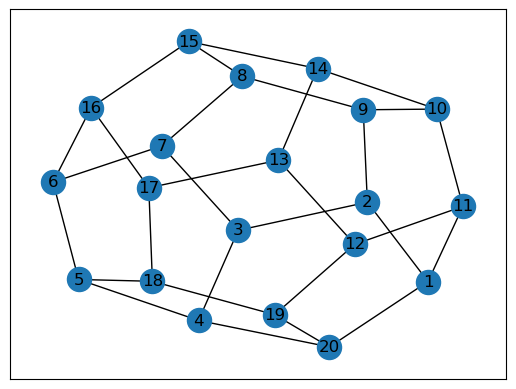

In [77]:
G = FileToNetwork("example2.txt")
DrawNetwork(G, "example2.png")

In [84]:
color, color2= DrawSolution(G, "example2.txt.part.2", "example2.part.plot.png")
print(color)
print(color2)

['blue', 'blue', 'blue', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green']
['blue', 'blue', 'green', 'blue', 'blue', 'blue', 'green', 'blue', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green']


In [85]:
print(G.nodes())

[1, 2, 20, 11, 3, 9, 4, 7, 5, 6, 18, 16, 8, 15, 10, 14, 12, 13, 19, 17]
